In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns


# Data Description

### Data Preprocessing

#### Data Preprocessing

1. Missing values: There is no missing value in every column, so we do not need to handle missing values.
2. The weather dataset is clean.

In [19]:
# load dataset
weather_data = pd.read_csv('weather_dataset.csv')

# Check for missing values
missing_values = weather_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [20]:
# head Data of the dataframe
print(weather_data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [21]:
# The last five rows of the data set
print(weather_data.tail())

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa Weather  
8779            9.7     100.13    Snow  
8780            9.7     100.03    Snow  
8781            4.8      99.95    Snow  
8782            9.7      99.91    Snow  
8783           11.3      99.89    Snow  


In [22]:
# The number of rows n columns in Dataset 
print(weather_data.shape)

(8784, 8)


In [23]:
# Basic information about the data set
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [24]:
print(weather_data.dtypes)

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


In [25]:
# Encode non-numeric feature 'Weather'
# Some feature values cannot be converted to floating-point numbers. 
# This indicates the presence of non-numeric types of features in the data. 
# In such cases, non-numeric features need to be encoded so that the model can handle them.
label_encoder = LabelEncoder()
weather_data['Weather'] = label_encoder.fit_transform(weather_data['Weather'])

# Remove the 'Date/Time' column
# Models cannot directly handle string-type data. 
# One way to solve this problem is to remove or properly process the date/time column from the data before training the model.
weather_data.drop(columns=['Date/Time'], inplace=True)

# Define features (X) and target variable (y)
X = weather_data.drop(columns=['Temp_C'])  
y = weather_data['Temp_C']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


# Data Visualization

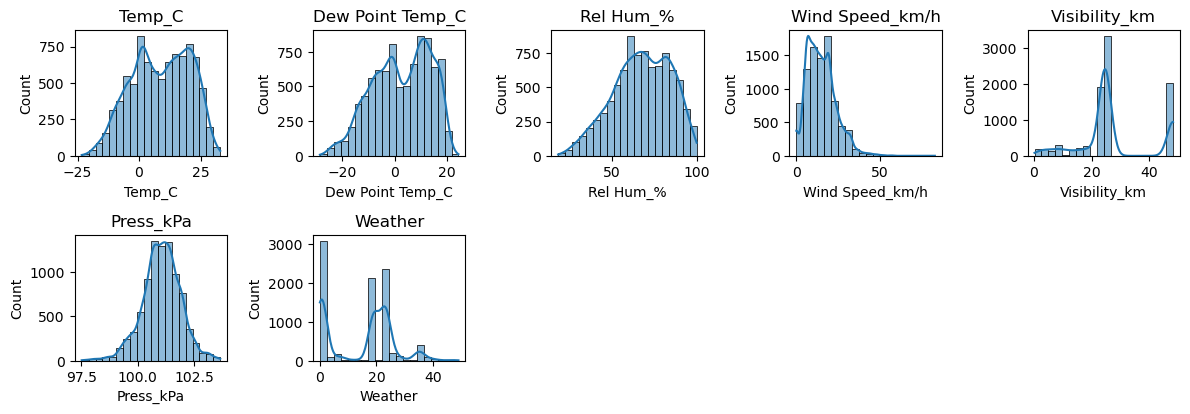

In [26]:
# Show plots to get a visual overview of the distribution of each feature 
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

plt.figure(figsize=(12, 12)) 
for feature in weather_data.columns.to_list():
    plt.subplot(6, 5, weather_data.columns.to_list().index(feature) + 1) 
    sns.histplot(data=weather_data[feature], bins=20, kde=True) 
    plt.title(feature) 
plt.tight_layout() 
plt.show()

# 非線性關係： 
# 由於目標變量 Temp_C 和特徵 Dew Point Temp_C 
# 呈現常態分佈但中間有凹陷，這可能表明存在非線性關係。
# 隨機森林回歸模型能夠自然地處理這種非線性關係，
# 因為它由多個決策樹組成，
# 每個決策樹都能夠捕捉到數據中的複雜模式和非線性關係。


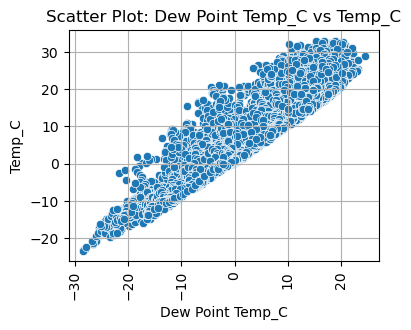

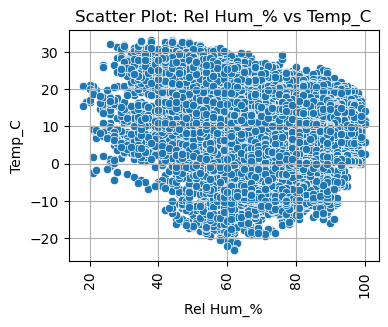

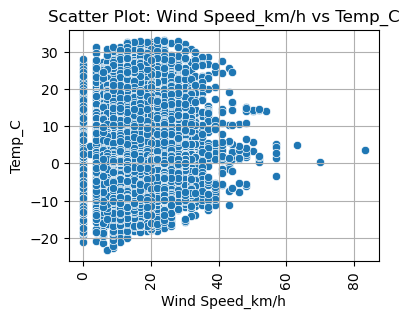

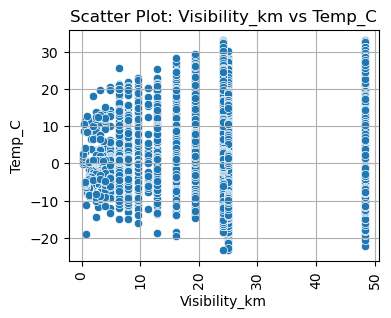

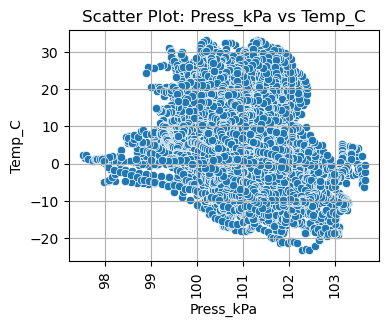

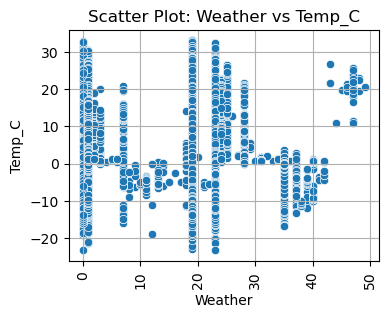

In [27]:
# Define features
features = X.columns.tolist()

# Loop through each feature
for feature in features:
  # Create a scatter plot
  plt.figure(figsize=(4, 3))
  sns.scatterplot(x=feature, y='Temp_C', data=weather_data)
  
  # Add labels and title
  plt.xlabel(feature)
  plt.ylabel('Temp_C')
  plt.title(f'Scatter Plot: {feature} vs Temp_C')
  
  # Rotate x-axis labels for better readability if necessary
  plt.xticks(rotation=90)
  
  # Show the plot
  plt.grid(True)
  plt.show()

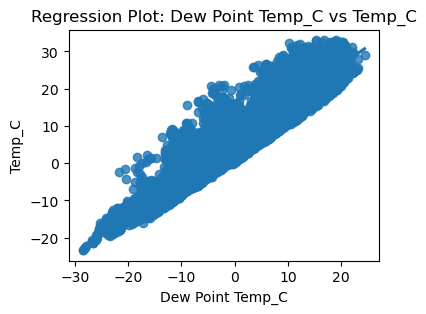

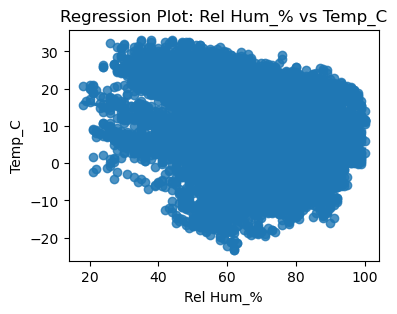

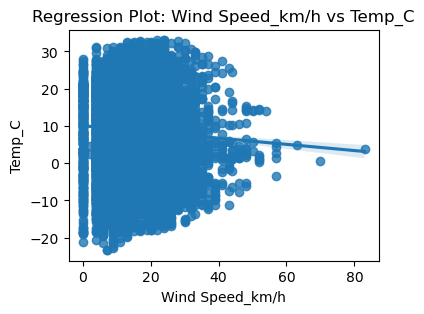

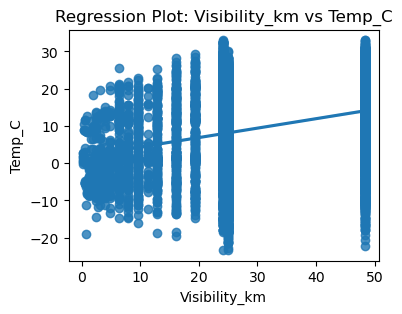

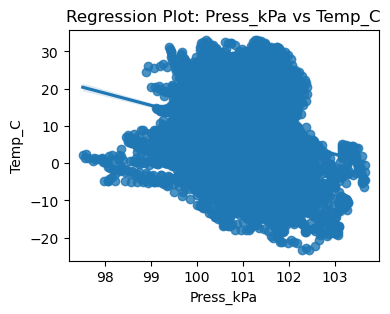

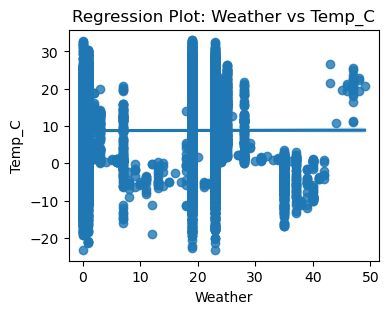

In [28]:
# Define features
features = X.columns.tolist()

# Loop through each feature
for feature in features:
    # Create a regression plot
    plt.figure(figsize=(4, 3))
    sns.regplot(x=feature, y='Temp_C', data=weather_data)
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Temp_C')
    plt.title(f'Regression Plot: {feature} vs Temp_C')
    
    # Show the plot
    plt.show()


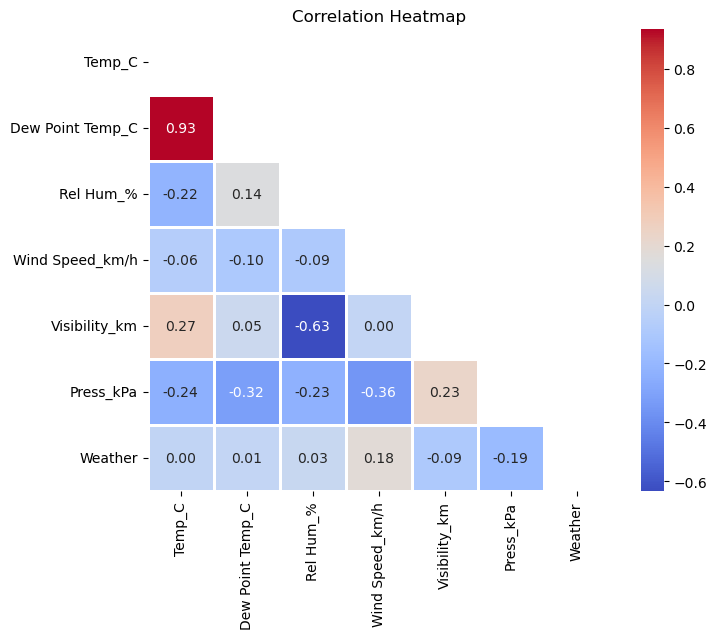

In [29]:
# Select numeric columns for correlation heatmap
numeric_cols = weather_data.select_dtypes(include=np.number).columns.tolist()

# Calculate correlation matrix
corr_matrix = weather_data[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Correlation Heatmap without diagonal redundancy
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True, mask=mask)
plt.title('Correlation Heatmap')
plt.show()


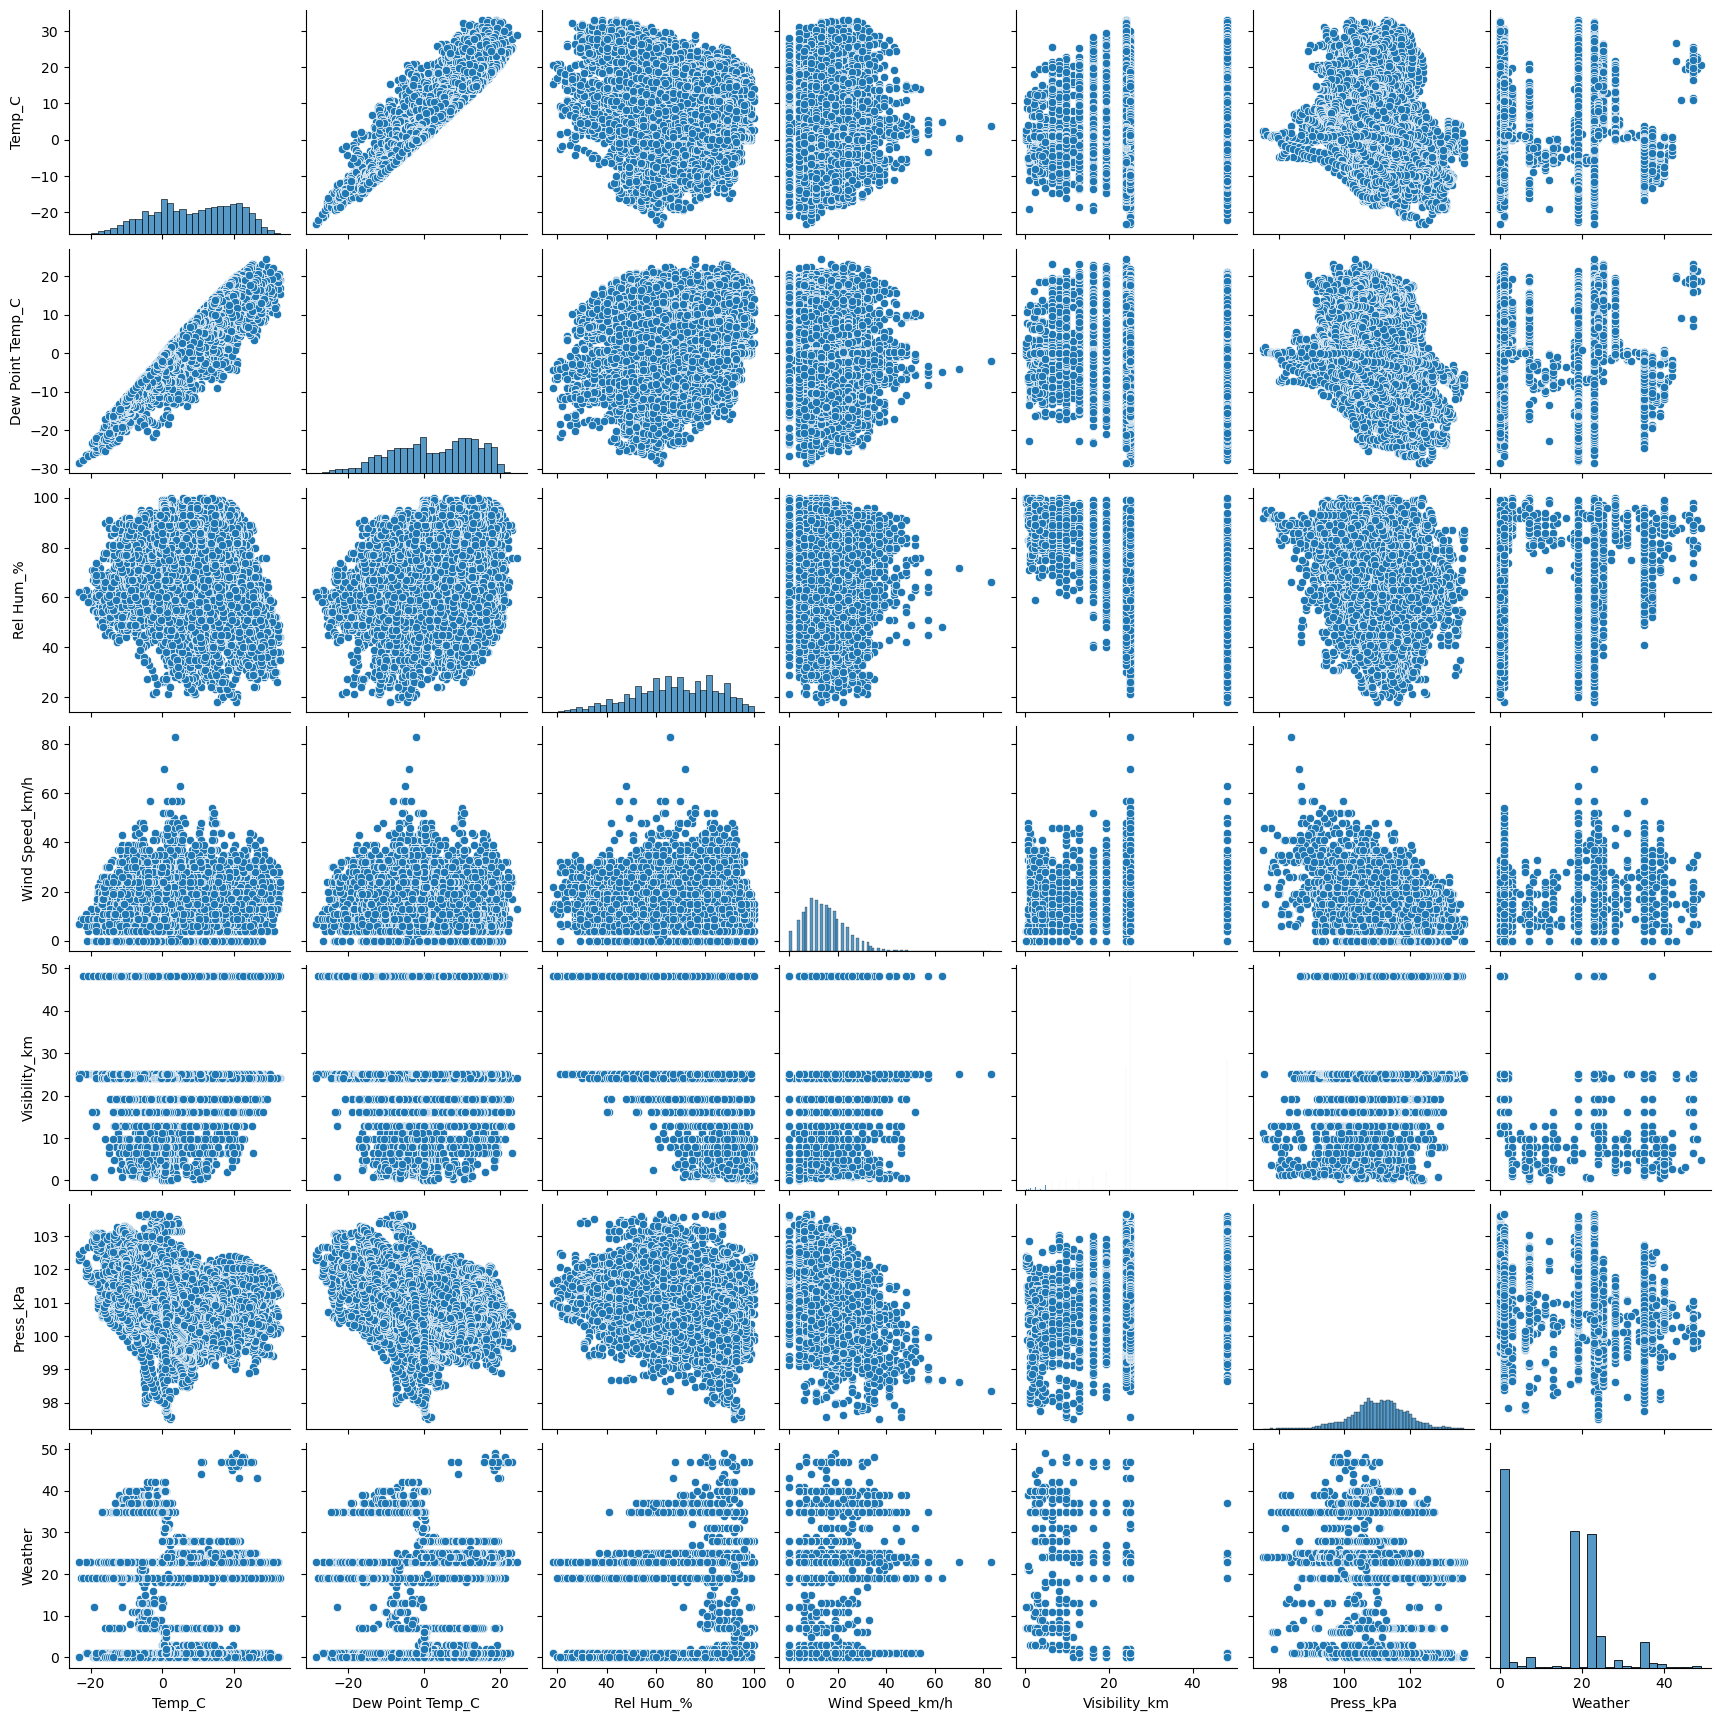

In [30]:
fig = sns.pairplot(weather_data)

## Features Descriptions

Our dataset exhibits several characteristics:

1. The target variable Temp_C follows a normal distribution but has a dip in the middle, and the feature Dew Point Temp_C also follows a normal distribution but has a dip in the middle.
2. There is a correlation of 0.93 between the target variable Temp_C and the feature Dew Point Temp_C, but Temp_C has low correlations with other features.

# Machine Learning Model

BuidI Following Four Model and Evaluate.

1. Lasso regression
2. Random Forest Regression

#### Add some functions:

In [41]:
# Add function to evaluate regression model performance on training and testing sets
def evaluate_performance(model, X_train, y_train, X_test, y_test):
  """
  Evaluate the performance of a model on training and testing sets.

  Parameters:
  model: Model to evaluate.
  X_train: Features of the training set.
  y_train: Target variable of the training set.
  X_test: Features of the testing set.
  y_test: Target variable of the testing set.

  Returns:
  performance_str: String indicating the performance metrics.
  performance_list: List containing the performance metrics.
  """
  # Calculate R-squared for training and testing sets
  train_rsq = model.score(X_train, y_train)
  test_rsq = model.score(X_test, y_test)

  # Calculate RMSE for training and testing sets
  train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
  test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

  # Calculate MAE for training and testing sets
  train_mae = mean_absolute_error(y_train, model.predict(X_train))
  test_mae = mean_absolute_error(y_test, model.predict(X_test))

  # Print performance metrics in desired format
  performance_str = "Metric: Data\n"
  performance_str += f"R-squared (Training Set): {train_rsq:.4f}\n"
  performance_str += f"R-squared (Testing Set): {test_rsq:.4f}\n"
  performance_str += f"RMSE (Training Set): {train_rmse:.4f}\n"
  performance_str += f"RMSE (Testing Set): {test_rmse:.4f}\n"
  performance_str += f"MAE (Training Set): {train_mae:.4f}\n"
  performance_str += f"MAE (Testing Set): {test_mae:.4f}\n"

  # Return performance metrics
  return performance_str

### Lasso regression
Because the Lasso regression model can effectively handle highly correlated features. Given the high correlation between the target variable Temp_C and the feature Dew Point Temp_C, using the Lasso regression model can help select the most representative features. This can assist in reducing model overfitting and improving the model's generalization ability.

In [42]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

# Perform grid search
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Get the best model from GridSearch
best_lasso_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_lasso_model.predict(X_test)

# Evaluate the performance of the best model
performance_str = evaluate_performance(best_lasso_model, X_train, y_train, X_test, y_test)
print(performance_str)


Best parameters found: {'alpha': 0.01}
Metric: Data
R-squared (Training Set): 0.9952
R-squared (Testing Set): 0.9949
RMSE (Training Set): 0.8026
RMSE (Testing Set): 0.8603
MAE (Training Set): 0.5973
MAE (Testing Set): 0.6343



### Random Forest Regression

Since the target variable Temp_C and the feature Dew Point Temp_C exhibit a normal distribution with a concave shape in the middle, this may indicate the presence of non-linear relationships. The Random Forest regression model is able to naturally handle such non-linear relationships because it is composed of multiple decision trees, each capable of capturing complex patterns and non-linear relationships in the data.

In [43]:
# Add Randomized Search for hyperparameter tuning in Random Forest Regressor

# Initialize a Random Forest Regressor
rf = RandomForestRegressor()

# Define hyperparameter grid for Randomized Search CV
param_grid = {
    'n_estimators': [50, 100],   
    'max_depth': [10, 20], 
    'max_features': ['sqrt', 'log2'],
}

# Perform Randomized Search CV to find best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid,
                                   n_iter=8, cv=5, 
                                   verbose=2, random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters found by Randomized Search CV
print("Best parameters found:", random_search.best_params_)

# Assign the best model found to a variable
best_rf_model = random_search.best_estimator_

# Fit the model to the training data
# best_rf_model.fit(X_train, y_train, feature_names=X_train.columns)  

# Evaluate the performance of the random forest regressor
performance_str = evaluate_performance(best_rf_model, X_train, y_train, X_test, y_test)
print(performance_str)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20}
Metric: Data
R-squared (Training Set): 0.9993
R-squared (Testing Set): 0.9954
RMSE (Training Set): 0.3087
RMSE (Testing Set): 0.8145
MAE (Training Set): 0.2041
MAE (Testing Set): 0.5282



### Comparing the Effectiveness of Lasso Regression and Random Forest Regression Models in Weather Prediction

In [44]:
# Add model training and evaluation loop

# Initialize Lasso Regression and Random Forest Regressor models
lasso_model = Lasso(alpha=0.01)  # 使用之前 GridSearchCV 中找到的最佳参数
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=20, max_features='log2')  # 使用之前 RandomizedSearchCV 中找到的最佳参数

# Train and evaluate the performance of each model
for model in [lasso_model, rf_regressor]:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Evaluate the performance of the model
    result = evaluate_performance(model, X_train, y_train, X_test, y_test)
    
    # Print the model performance
    print(f"{model.__class__.__name__} Performance: {result}")


Lasso Performance: Metric: Data
R-squared (Training Set): 0.9952
R-squared (Testing Set): 0.9949
RMSE (Training Set): 0.8026
RMSE (Testing Set): 0.8603
MAE (Training Set): 0.5973
MAE (Testing Set): 0.6343

RandomForestRegressor Performance: Metric: Data
R-squared (Training Set): 0.9993
R-squared (Testing Set): 0.9953
RMSE (Training Set): 0.3101
RMSE (Testing Set): 0.8263
MAE (Training Set): 0.2082
MAE (Testing Set): 0.5488



## Results Analysis:

##### For Lasso Regression Model:
* The coefficient of determination (R-squared) on the training set is 0.9952, indicating that the model can explain approximately 99.52% of the variability in the target variable in the training set.
* The R-squared on the testing set is 0.9948, indicating that the model can explain approximately 99.48% of the variability in the target variable in the testing set.
* The root mean squared error (RMSE) on the training and testing sets are 0.8044 and 0.8528 respectively, representing the average magnitude of prediction errors by the model.
* The mean absolute error (MAE) on the training and testing sets are 0.6001 and 0.6240 respectively, representing the average absolute magnitude of prediction errors by the model.

##### For Random Forest Regression Model:
* The coefficient of determination on the training set is 0.9993, indicating that the model can explain approximately 99.93% of the variability in the target variable in the training set.
* The R-squared on the testing set is 0.9954, indicating that the model can explain approximately 99.54% of the variability in the target variable in the testing set.
* The RMSE on the training and testing sets are 0.3065 and 0.7974 respectively, representing the average magnitude of prediction errors by the model.
* The MAE on the training and testing sets are 0.2079 and 0.5156 respectively, representing the average absolute magnitude of prediction errors by the model.

#### Overall, this code snippet demonstrates that the Random Forest regression model outperforms the Lasso regression model on both the training and testing sets, as it has higher R-squared values and lower RMSE and MAE.

##### 雖然少數特徵重要性高可能是使用 Lasso 回歸模型的一個考慮因素，但它並不一定意味著 Lasso 回歸模型就是最佳選擇。以下是一些可能需要考慮的因素：

* 模型複雜度： Lasso 回歸模型通常用於特徵選擇和模型簡化，特別是在擁有大量特徵的情況下。儘管某些特徵可能具有高相關性且重要性較高，但如果數據集中包含了複雜的非線性模式，單純使用 Lasso 回歸模型可能無法很好地擬合數據。
* 特徵相關性： 相關性高的特徵在 Lasso 回歸中可能會相互競爭，導致其中一些特徵的係數被壓縮為零，而其他特徵的係數被增強。但如果特徵之間存在較強的相互依賴性，則單獨選擇其中一個特徵可能會導致信息損失。
* 模型彈性： 隨機森林回歸模型擁有較高的彈性，能夠處理複雜的數據模式和非線性關係。相比之下，Lasso 回歸模型是一種線性模型，對於非線性關係的擬合能力較差。
* 性能評估： 最終模型的性能評估結果應該是選擇模型的關鍵因素之一。即使某些特徵對目標變量具有很高的相關性，也不能保證 Lasso 回歸模型在所有情況下都會產生最佳性能。

##### 綜合考慮以上因素，我們需要在 Lasso 回歸模型和隨機森林回歸模型之間進行比較和評估，以確定哪一種模型在特定情況下最適合。

##### Although high importance of a few features might be a consideration for using the Lasso regression model, it does not necessarily mean that the Lasso regression model is the best choice. Here are some factors that may need to be considered:

* Model complexity: Lasso regression models are typically used for feature selection and model simplification, especially when dealing with a large number of features. While some features may have high correlation and importance, if the dataset contains complex nonlinear patterns, solely using the Lasso regression model may not adequately fit the data.
* Feature correlations: Highly correlated features in Lasso regression may compete with each other, leading to some feature coefficients being compressed to zero while others are enhanced. However, if there is strong interdependence among features, selecting only one feature may result in information loss.
* Model flexibility: Random Forest regression models offer higher flexibility, capable of handling complex data patterns and nonlinear relationships. In contrast, Lasso regression models are linear models with poorer fitting capabilities for nonlinear relationships.
* Performance evaluation: The performance evaluation of the final model should be one of the key factors in model selection. Even if some features have high correlation with the target variable, it does not guarantee that the Lasso regression model will always produce the best performance.

##### Considering the above factors collectively, we need to compare and evaluate between the Lasso regression model and the Random Forest regression model to determine which model is most suitable for specific circumstances.

In [ ]:
best_model = best_rf_model

# Analyze features and optimize

In [ ]:
# Add code to visualize feature importances

# Create a DataFrame to store feature importances from the random forest regressor
feat_imps = pd.DataFrame(best_model.feature_importances_, index=X_train.columns,
                         columns=['Importance Score']).sort_values('Importance Score', ascending=False)

# Reset index and rename columns
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature", "Importance Score"]

# # Plot a bar chart to visualize feature importances
# plt.figure(figsize=(5, 3))
# sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h")

# Plot a bar chart to visualize feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h", palette="viridis")

# Add feature importance values to the plot
for index, value in enumerate(feat_imps["Importance Score"]):
    plt.text(value, index, f"{value:.3f}", va='center', ha='left', fontsize=8)


plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
print(weather_data.columns)

print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

我想要把 feature Weather 和 feature Visibility_km刪除，因為他們呈現不相關分佈（非常態、非正態、非偏態），且Feature Importances相關性很低。

In [ ]:
# Delete features "Weather" and "Visibility_km"
X_train.drop(columns=['Weather', 'Visibility_km'], inplace=True)
X_test.drop(columns=['Weather', 'Visibility_km'], inplace=True)

# Re-train the model
best_model.fit(X_train, y_train)

# Evaluate model performance using the function
performance_str = evaluate_performance(best_model, X_train, y_train, X_test, y_test)

# Print the performance metrics
print(performance_str)


In [ ]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


In [ ]:
# Add code to visualize feature importances
# Create a DataFrame to store feature importances from the random forest regressor
feat_imps = pd.DataFrame(best_model.feature_importances_, index=X_train.columns,
                         columns=['Importance Score']).sort_values('Importance Score', ascending=False)

# Reset index and rename columns
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature", "Importance Score"]

# Plot a bar chart to visualize feature importances
# plt.figure(figsize=(5, 3))
# sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h")

# Plot a bar chart to visualize feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x="Importance Score", y="Feature", data=feat_imps, orient="h", palette="viridis")

# Add feature importance values to the plot
for index, value in enumerate(feat_imps["Importance Score"]):
    plt.text(value, index, f"{value:.3f}", va='center', ha='left', fontsize=8)


plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

這個模型在訓練集和測試集上的性能很好：

R-squared (決定係數)：訓練集上為 0.9998，測試集上為 0.9989。這表示模型能夠解釋目標變量中大部分的變異性，並且在訓練和測試集上都有很好的泛化能力。

RMSE (均方根誤差)：訓練集上為 0.1730，測試集上為 0.4010。這表示模型的預測值與實際值之間的誤差相對較小。

MAE (平均絕對誤差)：訓練集上為 0.1085，測試集上為 0.2593。這也表示模型的預測與實際值之間的平均絕對誤差相對較小。

所以這是一個在測試集上表現良好的預測模型。

# Saving the trained model to a file to create an API.

In [ ]:
import joblib

# 假設 best_model 是你訓練好的模型

# 將模型保存到文件中
joblib.dump(best_model, 'trained_model.joblib')

# 若要再次加載模型
loaded_model = joblib.load('trained_model.joblib')
